<a href="https://colab.research.google.com/github/uttamk22/AIML/blob/main/Custom_Random_SearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy 
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

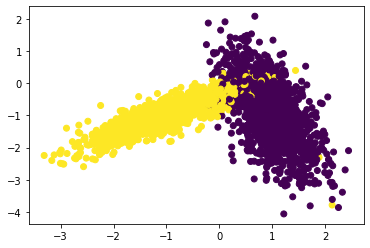

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [31]:

from sklearn.metrics import accuracy_score
def RandomSearchCV(X_train,Y_train,classifier,param_range, folds):
  
  #generate 10 unique values from param_range
  params = sorted(random.sample([i for i in range(param_range[0], param_range[1])], 10))
  print(params)
  #derive numbers ranging from 0 to length(x_train) into groups based on the fold
  groups = []
  for i in range(folds):
    if i == 0:
      groups.append((0, int(len(X_train)/folds)))
    elif i == folds-1:
      groups.append((groups[i-1][1]+1, len(X_train)))
    else:
      groups.append((groups[i-1][1]+1, groups[i-1][1]+int(len(X_train)/folds)))
  # create list of indices based on the range of groups
  groups_indices = [[i for i in range(item[0],item[1])] for item in groups]

  trainscores = []
  testscores = []
  # for each params randomly sampled from the params range
  for k in tqdm(params):
    trainscores_folds = []
    testscores_folds = []
    # for each folds run create train and test data and calculate accuracy score
    for j in range(folds):
      # keep j the group as test indices and rest as train indices 
      test_indices = groups_indices[j]
      train_indices = list(set(list(range(1, len(X_train)))) - set(test_indices))

       # selecting the data points based on the train_indices and test_indices
      train_x = X_train[train_indices]
      train_y = Y_train[train_indices]
      test_x  = X_train[test_indices]
      test_y  = Y_train[test_indices]
      
      # for each k hypermeter, fit the KNN models using KNN classifier
      classifier.n_neighbors = k
      classifier.fit(train_x, train_y)
      Y_predicted = classifier.predict(test_x) #predict y value for test data
      testscores_folds.append(accuracy_score(test_y, Y_predicted)) #calculate accuracy scores on test data and add in list
      Y_predicted = classifier.predict(train_x) #predict y value for train data
      trainscores_folds.append(accuracy_score(train_y, Y_predicted)) #calculate accuracy scores on train data and add in list
    trainscores.append(np.mean(np.array(trainscores_folds))) #calculate mean of train data accuracy score for each K
    testscores.append(np.mean(np.array(testscores_folds))) #calculate mean of test data accuracy score for each K
  return params,trainscores,testscores
    



[5, 10, 13, 19, 22, 23, 24, 25, 27, 28]


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


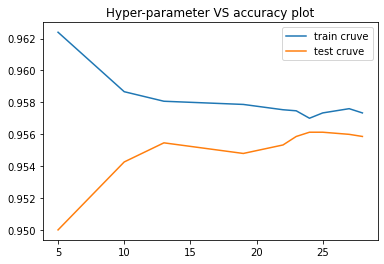

In [32]:

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()
params = (3,30)
folds = 3
params,trainscores,testscores = RandomSearchCV(X_train, y_train, neigh, params, folds)

plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()




In [33]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()


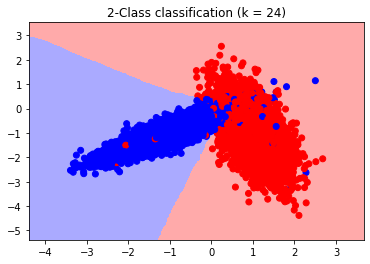

In [39]:
from matplotlib.colors import ListedColormap
#using k = 24 as it's the best hyperparameter here as per our random search hyperparameter tunning
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)
#plot decision boundary to see how good we classified
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, knn)